# Atividade 3

## Redes neurais simples

Na pasta **NNFS** ilustramos o funcionamento básico de uma rede neural e a utilizamos para fazer um treinamento ilustrativo onde a rede neural simplesmente aprendeu a interpolar uma função seno no intervalo de 0 a 2π. Vimos que qualquer tentativa de extrapolação falha.

Em todos os casos, use MSE para a fução de perda (loss), otimizador Adam e funções de ativação `tanh`. Varie o número de camadas ocultas e neurônios por camada para ver como afetam o resultado. 

Há muitos outros parâmetros que podem ser ajustados, como a taxa de aprendizado, número de épocas, batch size, número de pontos. Procure entender o que são estes parâmetros e como afetam os resultados.

Anote tudo que aprender na forma de um relatório informal, mas organizado. Pode ser um arquivo markdown ou um jupyter notebook que serão salvos no seu github. 

### Instruções básicas

Eu vou enviar por email um exemplo de implementação em scikit-learn para vocês explorarem. Façam o mesmo com PyTorch ou TensorFlow.

Treinem a rede neural para interpolar algumas funções e procurem entender como o número de camadas e neurônios afetam o resultado. Lembrem-se que excesso de parâmetros pode levar a overfitting.

Funções de teste para treinar:

- seno, cosseno, tangente no intervalo de 0 a 2π
- função sync(x) = sin(x)/x no intervalo de -10 a 10
- função gaussiana no intervalo de -10 a 10

### Treinar derivadas

Vamos tentar ensinar a rede neural a calcular derivadas numéricas. Para isso, vamos definir um domínio comum de 0 a 2π a fim de depois testar com funções trigonométricas.

Use como input N pontos gerados por polinômios, e como output a sua derivada. Varie a potência p de 0 a 10 ao longo do treinamento.

```python
x = np.random.random(0, 2*np.pi)
x_input  = x ** p
x_output = p * x ** (p-1)
```

Finalizado o treinamento, faça um teste (predict) usando uma função trigonométrica como input e verifique se o output retorna sua derivada!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


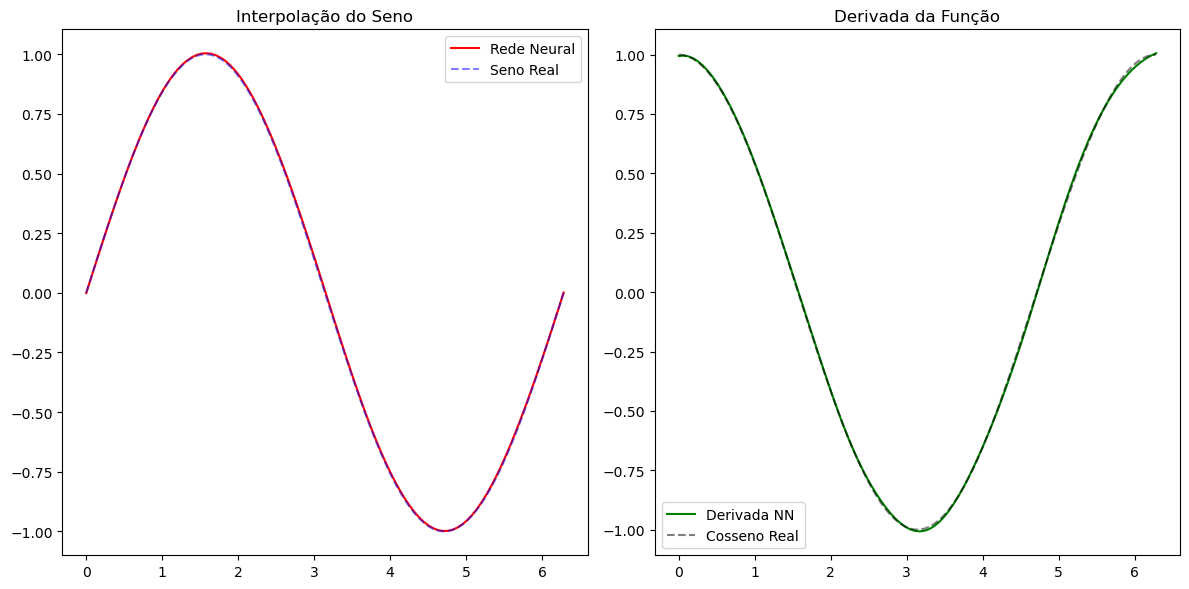

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Gerar dados de treino (função seno)
x_train = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
y_train = np.sin(x_train)

# Dados de teste (mais espaçados para visualização)
x_test = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)

model = Sequential([
    Dense(64, activation='tanh', input_shape=(1,)),  # Camada oculta 1
    Dense(64, activation='tanh'),                   # Camada oculta 2
    Dense(1)                                       # Saída linear
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

# Criar função para calcular a derivada
def compute_derivative(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y_pred = model(x_tensor)
    dy_dx = tape.gradient(y_pred, x_tensor)
    return dy_dx.numpy()

# Calcular derivada nos pontos de teste
derivatives = compute_derivative(model, x_test)

# Derivada analítica (cos(x))
true_derivatives = np.cos(x_test)

# Predições da rede
predictions = model.predict(x_test)

plt.figure(figsize=(12, 6))

# Plot da função seno
plt.subplot(1, 2, 1)
plt.plot(x_test, predictions, 'r-', label='Rede Neural')
plt.plot(x_test, np.sin(x_test), 'b--', label='Seno Real', alpha=0.5)
plt.title('Interpolação do Seno')
plt.legend()

# Plot das derivadas
plt.subplot(1, 2, 2)
plt.plot(x_test, derivatives, 'g-', label='Derivada NN')
plt.plot(x_test, true_derivatives, 'k--', label='Cosseno Real', alpha=0.5)
plt.title('Derivada da Função')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Criar função para calcular a derivada
def compute_derivative(model, x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y_pred = model(x_tensor)
    dy_dx = tape.gradient(y_pred, x_tensor)
    return dy_dx.numpy()

# Calcular derivada nos pontos de teste
derivatives = compute_derivative(model, x_test)

# Derivada analítica (cos(x))
true_derivatives = np.cos(x_test)

# Predições da rede
predictions = model.predict(x_test)

plt.figure(figsize=(12, 6))

# Plot da função seno
plt.subplot(1, 2, 1)
plt.plot(x_test, predictions, 'r-', label='Rede Neural')
plt.plot(x_test, np.sin(x_test), 'b--', label='Seno Real', alpha=0.5)
plt.title('Interpolação do Seno')
plt.legend()

# Plot das derivadas
plt.subplot(1, 2, 2)
plt.plot(x_test, derivatives, 'g-', label='Derivada NN')
plt.plot(x_test, true_derivatives, 'k--', label='Cosseno Real', alpha=0.5)
plt.title('Derivada da Função')
plt.legend()

plt.tight_layout()
plt.show()

: 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

layers = 3
neurons = 5
seed = 42
max_epochs = 100000

# Gerar dados de treinamento (x e y = sin(x))
x_train = np.linspace(0, 2 * np.pi, 1000)
y_train = np.sin(x_train)

# Criar o modelo
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # Primeira camada oculta
model.add(Dense(64, activation='relu'))  # Segunda camada oculta
model.add(Dense(1, activation='linear'))  # Saída linear (previsão do seno)

# Compilar o modelo
model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Fazer previsões
x_test = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y_pred = model.predict(x_test)

# Plotar resultados
plt.plot(x_test, np.sin(x_test), label='Seno Real', color='blue')
plt.plot(x_test, y_pred, label='Predição da Rede Neural', color='red', linestyle='dashed')
plt.legend()
plt.show()